In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
df=pd.read_csv('weatherAUS(Prepared).csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.472516,7.63054,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.472516,7.63054,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.472516,7.63054,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.472516,7.63054,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,2017-06-20,Uluru,3.5,21.8,0.0,5.472516,7.63054,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0,0
140783,2017-06-21,Uluru,2.8,23.4,0.0,5.472516,7.63054,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0,0
140784,2017-06-22,Uluru,3.6,25.3,0.0,5.472516,7.63054,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0,0
140785,2017-06-23,Uluru,5.4,26.9,0.0,5.472516,7.63054,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0,0


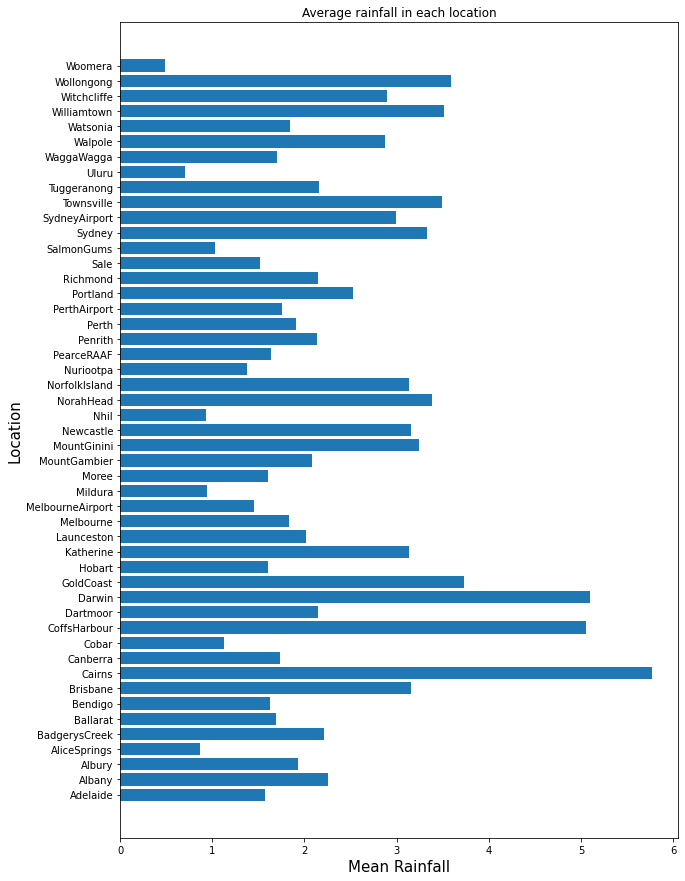

In [2]:
p=df.groupby(by='Location',as_index=False).mean()
plt.figure(figsize=(10,15))
plt.title('Average rainfall in each location')
plt.barh(p['Location'],p['Rainfall'])
plt.xlabel('Mean Rainfall',size=15)
plt.ylabel('Location',size=15)
plt.show()

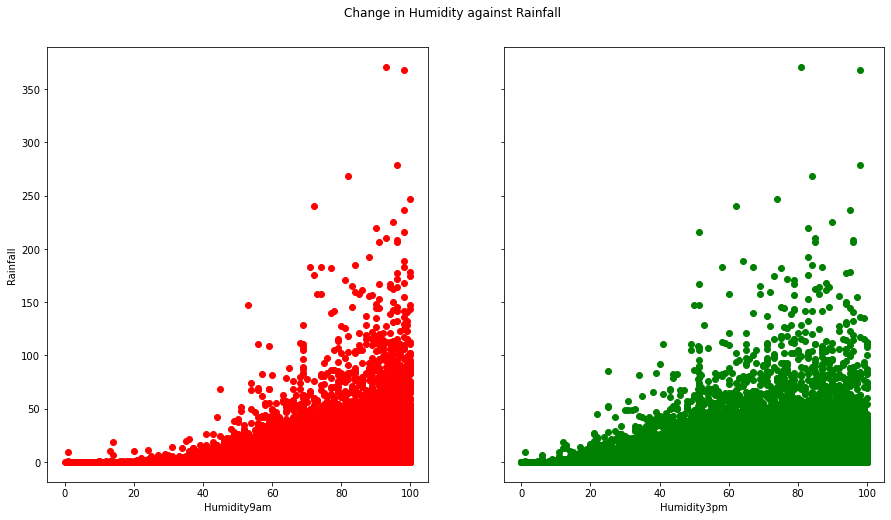

In [3]:
fig, ax = plt.subplots(1,2,figsize=(15,8),sharey=True)

#Graph 1
ax[0].scatter(df['Humidity9am'],df['Rainfall'],color='r')
ax[0].set_xlabel('Humidity9am')
ax[0].set_ylabel('Rainfall')

#Graph 2
ax[1].scatter(df['Humidity3pm'],df['Rainfall'],color='g')
ax[1].set_xlabel('Humidity3pm')


plt.suptitle('Change in Humidity against Rainfall',y=0.95)
plt.show()

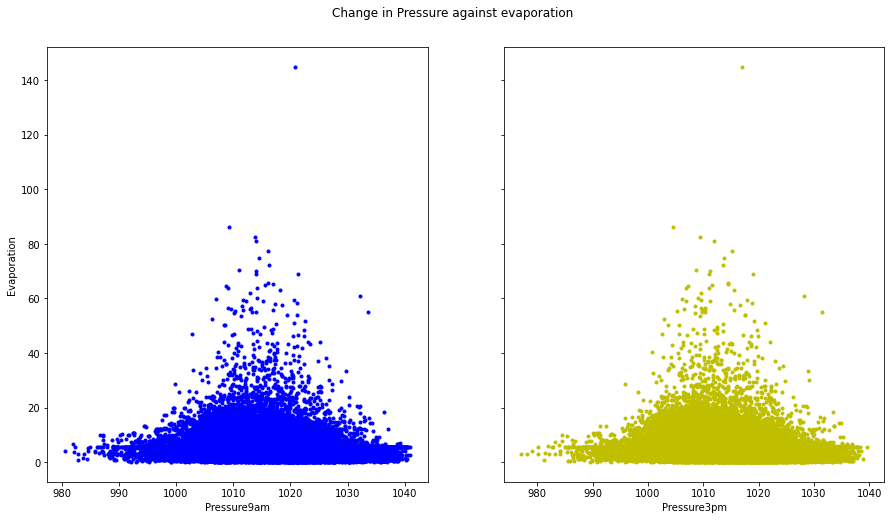

In [4]:
fig, ax = plt.subplots(1,2,figsize=(15,8),sharey=True)

#Graph 1
ax[0].scatter(df['Pressure9am'],df['Evaporation'],color='b',marker='.')
ax[0].set_xlabel('Pressure9am')
ax[0].set_ylabel('Evaporation')

#Graph 2
ax[1].scatter(df['Pressure3pm'],df['Evaporation'],color='y',marker='.')
ax[1].set_xlabel('Pressure3pm')


plt.suptitle('Change in Pressure against evaporation',y=0.95)
plt.show()

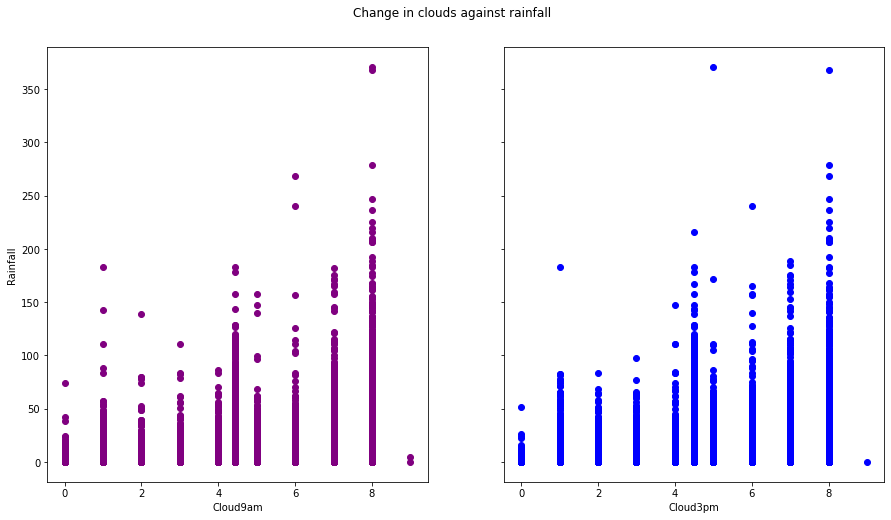

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15,8),sharey=True)

#Graph 1
ax[0].scatter(df['Cloud9am'],df['Rainfall'],color='purple')
ax[0].set_xlabel('Cloud9am')
ax[0].set_ylabel('Rainfall')

#Graph 2
ax[1].scatter(df['Cloud3pm'],df['Rainfall'],color='blue')
ax[1].set_xlabel('Cloud3pm')


plt.suptitle('Change in clouds against rainfall',y=0.95)
plt.show()

In [6]:
sns.pairplot(data=df)

Error in callback <function flush_figures at 0x0000023DDCFD73A0> (for post_execute):


KeyboardInterrupt: 

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

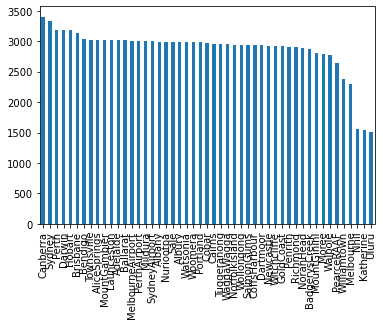

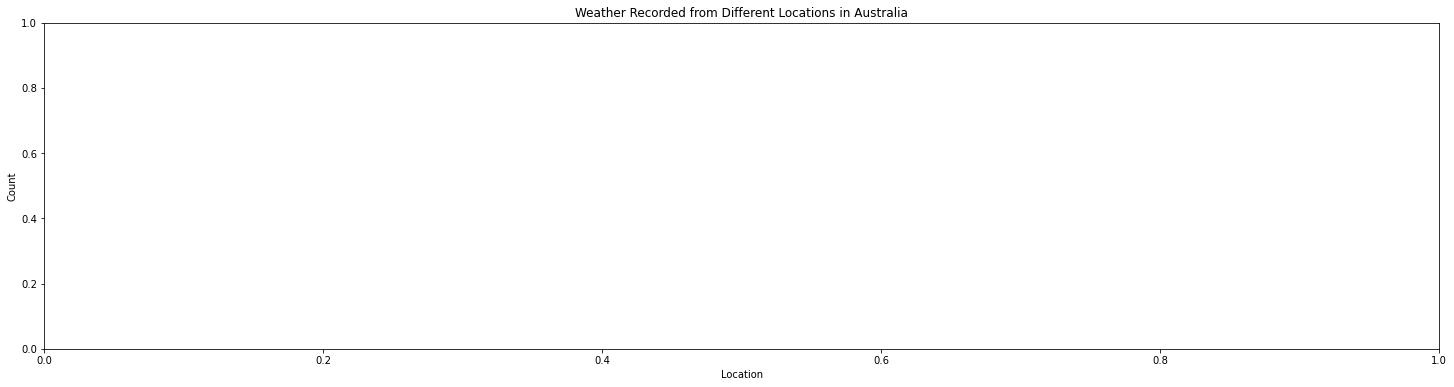

In [7]:
vis2 = df['Location'].value_counts().plot(kind='bar')
plt.figure(figsize=(25,6))
plt.title("Weather Recorded from Different Locations in Australia") 
plt.xlabel("Location") 
plt.ylabel("Count")
vis2.bar_label(vis2.containers[0])

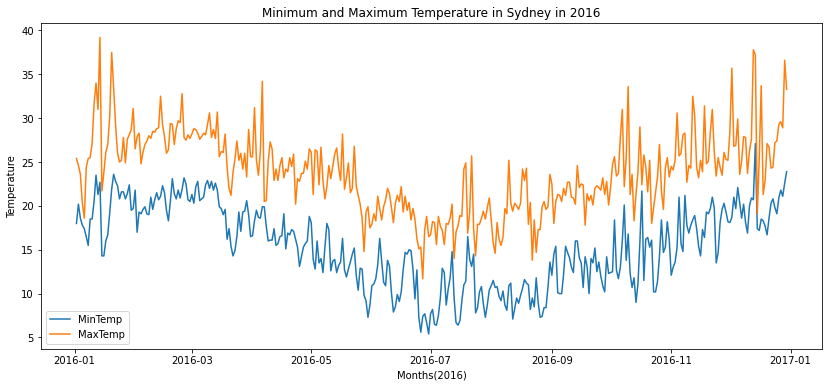

In [8]:
df.Date=pd.to_datetime(df.Date)
start_date = pd.to_datetime('1/1/2016')
end_date = pd.to_datetime('12/31/2016')
df2016 = df.loc[(df['Date'] > start_date) & (df['Date'] < end_date)]
df2016 = df2016.loc[(df2016['Location'] == 'Sydney')]
df20162 = df2016[['Date','Location','MinTemp','MaxTemp']]

x1 = df20162['MinTemp']
x2 = df20162['MaxTemp']
y = df20162['Date']

plt.figure(figsize=(14,6))

plt.plot(y,x1, label = 'MinTemp')
plt.plot(y,x2, label = 'MaxTemp')

plt.title('Minimum and Maximum Temperature in Sydney in 2016')
plt.xlabel('Months(2016)')
plt.ylabel('Temperature')

plt.legend()

plt.show()

In [9]:
df=pd.read_csv('weatherAUS(Prepared).csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.472516,7.63054,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.472516,7.63054,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.472516,7.63054,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.472516,7.63054,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,2017-06-20,Uluru,3.5,21.8,0.0,5.472516,7.63054,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0,0
140783,2017-06-21,Uluru,2.8,23.4,0.0,5.472516,7.63054,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0,0
140784,2017-06-22,Uluru,3.6,25.3,0.0,5.472516,7.63054,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0,0
140785,2017-06-23,Uluru,5.4,26.9,0.0,5.472516,7.63054,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0,0


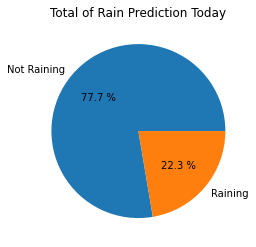

In [10]:
no = df.loc[df['RainToday'] == 0].count()[0]
yes = df.loc[df['RainToday'] == 1].count()[0]

labels = ['Not Raining', 'Raining']

plt.title('Total of Rain Prediction Today')

plt.pie([no, yes], labels=labels, autopct='%.1f %%')
plt.show()

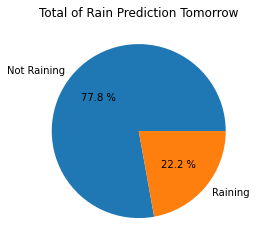

In [11]:
no = df.loc[df['RainTomorrow'] == 0].count()[0]
yes = df.loc[df['RainTomorrow'] == 1].count()[0]

labels = ['Not Raining', 'Raining']

plt.title('Total of Rain Prediction Tomorrow')

plt.pie([no, yes], labels=labels, autopct='%.1f %%')
plt.show()

In [12]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.472516,7.63054,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.472516,7.63054,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.472516,7.63054,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.472516,7.63054,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,2017-06-20,Uluru,3.5,21.8,0.0,5.472516,7.63054,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0,0
140783,2017-06-21,Uluru,2.8,23.4,0.0,5.472516,7.63054,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0,0
140784,2017-06-22,Uluru,3.6,25.3,0.0,5.472516,7.63054,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0,0
140785,2017-06-23,Uluru,5.4,26.9,0.0,5.472516,7.63054,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0,0


In [13]:
df['Date'] = pd.DatetimeIndex(df['Date']).year
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0
1,2008,Albury,7.4,25.1,0.0,5.472516,7.63054,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0
2,2008,Albury,12.9,25.7,0.0,5.472516,7.63054,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0
3,2008,Albury,9.2,28.0,0.0,5.472516,7.63054,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0
4,2008,Albury,17.5,32.3,1.0,5.472516,7.63054,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,2017,Uluru,3.5,21.8,0.0,5.472516,7.63054,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0,0
140783,2017,Uluru,2.8,23.4,0.0,5.472516,7.63054,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0,0
140784,2017,Uluru,3.6,25.3,0.0,5.472516,7.63054,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0,0
140785,2017,Uluru,5.4,26.9,0.0,5.472516,7.63054,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0,0


In [14]:
df.loc[df['Date'] >= 2015]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2092,2015,Albury,11.4,33.5,0.0,5.472516,7.63054,WSW,30.0,ESE,...,45.0,14.0,1013.5,1011.0,4.431161,4.49925,21.0,32.7,0,0
2093,2015,Albury,15.5,39.6,0.0,5.472516,7.63054,NE,56.0,ESE,...,45.0,12.0,1016.0,1012.4,4.431161,4.49925,25.6,38.2,0,0
2094,2015,Albury,17.1,38.3,0.0,5.472516,7.63054,NNE,48.0,NE,...,35.0,19.0,1017.9,1012.3,4.431161,4.49925,29.2,37.0,0,0
2095,2015,Albury,26.0,33.1,0.0,5.472516,7.63054,NNE,41.0,ESE,...,46.0,37.0,1013.6,1012.1,8.000000,5.00000,27.4,30.9,0,0
2096,2015,Albury,19.0,35.2,0.0,5.472516,7.63054,E,33.0,SSE,...,60.0,34.0,1017.4,1014.7,8.000000,4.49925,25.6,32.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,2017,Uluru,3.5,21.8,0.0,5.472516,7.63054,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0,0
140783,2017,Uluru,2.8,23.4,0.0,5.472516,7.63054,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0,0
140784,2017,Uluru,3.6,25.3,0.0,5.472516,7.63054,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0,0
140785,2017,Uluru,5.4,26.9,0.0,5.472516,7.63054,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0,0


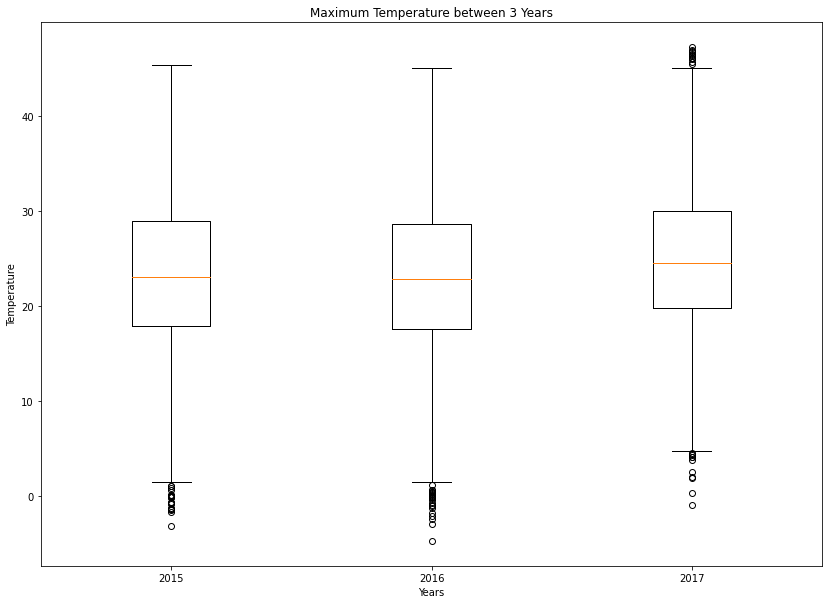

In [25]:
year15 = df.loc[df.Date == 2015]['MaxTemp']
year16 = df.loc[df.Date == 2016]['MaxTemp']
year17 = df.loc[df.Date == 2017]['MaxTemp']

labels = ['2015','2016','2017']

plt.figure(figsize=(14,10))

plt.boxplot([year15,year16,year17], labels=labels)
plt.title('Maximum Temperature between 3 Years')
plt.xlabel('Years')
plt.ylabel('Temperature')

plt.show()